In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [73]:
class IdealGas:

    def __init__(self, nparticles, mass, radius, xlim, ylim, t):
        
        self.nparticles = nparticles #number of particles 
        self.mass = mass #mass of particles 
        self.radius = radius #radius of particles 
        self.xlim = xlim
        self.ylim = ylim 
        self.A = (xlim[1]- xlim[0])*(ylim[1]-ylim[0])
        self.t = t #array of times for the animation
        self.dt = t[1]-t[0]

        self.r = np.stack((np.random.uniform(*xlim, nparticles), 
                           np.random.uniform(*ylim, nparticles))).reshape((nparticles,2))
        

        self.v = np.stack((np.random.uniform(-100,100, nparticles), 
                           np.random.uniform(-100,100, nparticles))).reshape((nparticles,2))
        
        
    def dij(self):

        dist_matrix = np.zeros((self.nparticles, self.nparticles))

        for i in range(self.nparticles):
            for j in range(i, self.nparticles):

                dist_matrix[i,j] = np.linalg.norm(self.r[i]-self.r[j])

        return dist_matrix

    

    def check_collisions(self):

        """Checks if there has been a collision between 2 particles. If so, 
        updates the velocities taking into account conservation of energy
        and momentum."""
        
        dist_pairs = self.dij()
        rows,cols = np.triu_indices(self.nparticles, k=1)
        collisions = np.where(dist_pairs[rows,cols]<=2*self.radius)[0]
        i,j = rows[collisions], cols[collisions]
        vdiff = self.v[i] - self.v[j]
        rdiff = self.r[i] - self.r[j]
        self.v[i] = self.v[i] -rdiff*(np.sum(rdiff*vdiff,axis=1)/np.sum(rdiff**2,axis=1))[:,np.newaxis]
        self.v[j] = self.v[i] +rdiff*(np.sum(rdiff*vdiff,axis=1)/np.sum(rdiff**2,axis=1))[:,np.newaxis]
        
        return i,j



    def step(self): 
        """1) check wall collisions and update the velocities for the particles in question
        2) check particle collisions and update the velocities. 
        3) step the positions"""
        self.check_collisions()
        #step the positions
        self.r += self.v*self.dt


    def animate(self):

        positions = np.zeros((self.nparticles,2,len(self.t)))
        velocities = np.zeros((self.nparticles, len(self.t)))

        for n,t in enumerate(self.t):

            self.step()

            positions[:,:,n] = self.r
            velocities[:,n] = np.sqrt(np.sum(self.v**2,axis=1))

        return positions








    
        




In [74]:
nparticles = 20
mass = 1
radius = 0.05
xlim = [0,1]
ylim = [0,1]
t = np.linspace(0,10,1000)
gas = IdealGas( nparticles, mass, radius, xlim, ylim, t)

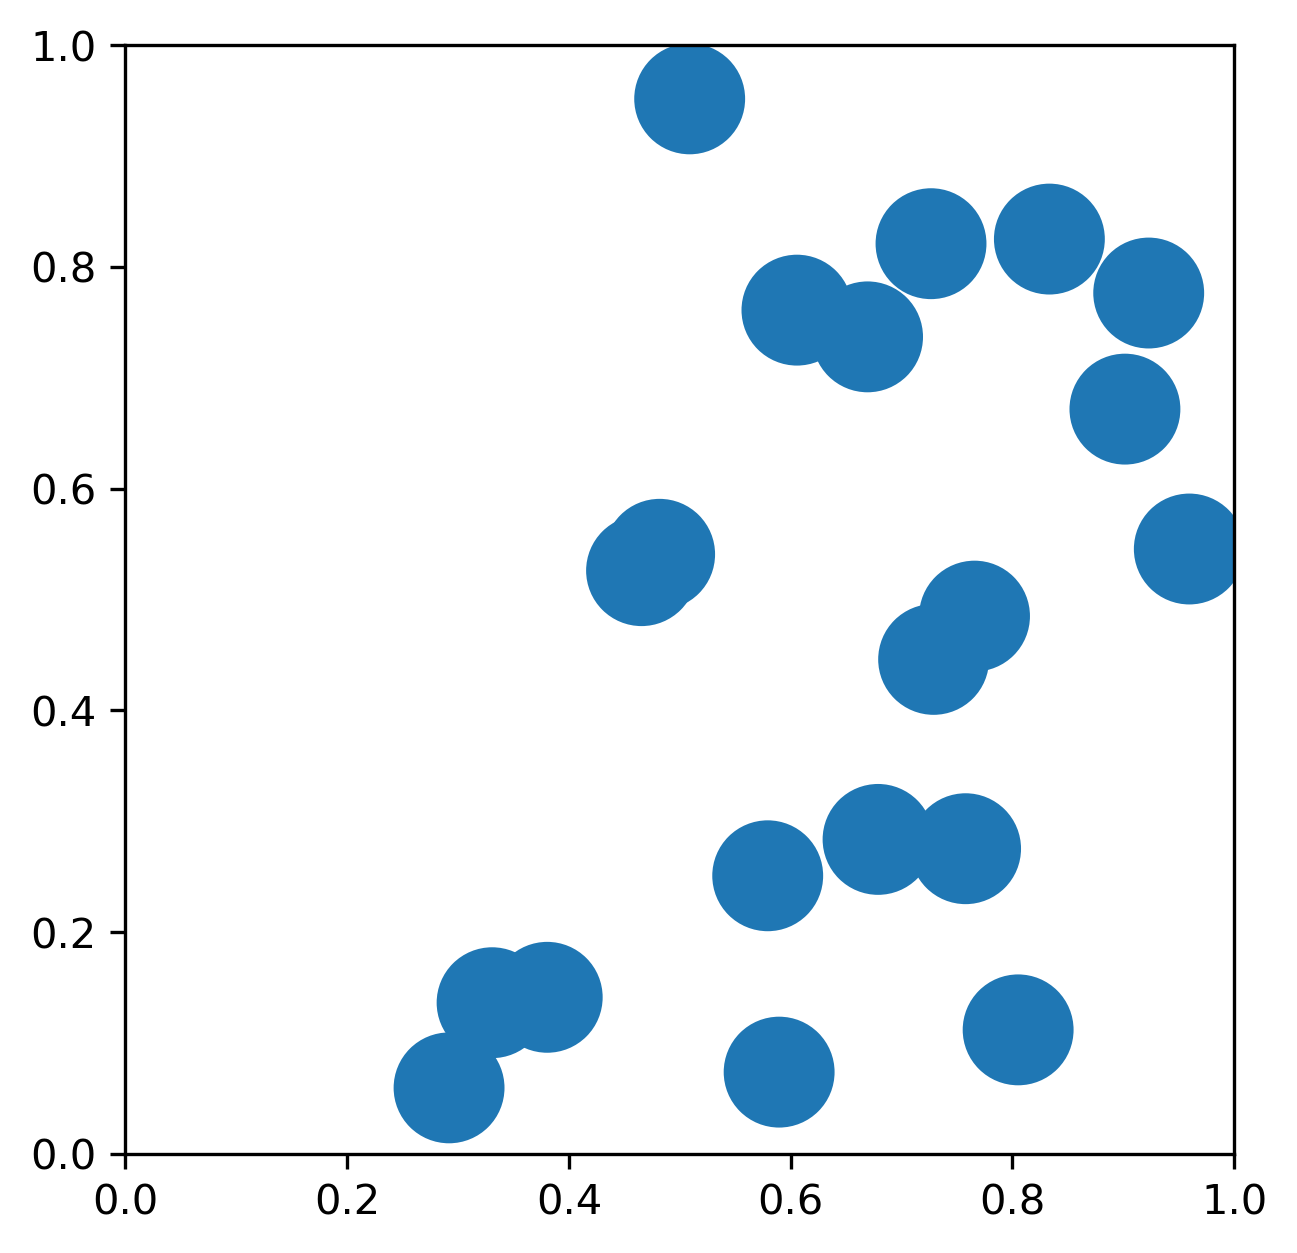

In [75]:
plt.gca().set_aspect('equal')
for (x,y) in zip(gas.r[:,0], gas.r[:,1]):
    circle = plt.Circle((x,y), gas.radius, fill=True)
    plt.gca().add_artist(circle)


In [76]:
pos = gas.animate()

TypeError: Cannot interpret '1000' as a data type

In [72]:
pos.shape

(20, 2, 1000)

# 2D Elastic collision

$$ \bold v_i' = \bold v_i - \frac{(\bold v_i - \bold v_j) \cdot (\bold r_i - \bold r_j)}{(\bold r_i - \bold r_j) \cdot (\bold r_i - \bold r_j)} (\bold r_i - \bold r_j) $$
$$ \bold v_j' = \bold v_j - \frac{(\bold v_j - \bold v_i) \cdot (\bold r_j - \bold r_i)}{(\bold r_j - \bold r_i) \cdot (\bold r_i - \bold r_j)} (\bold r_j - \bold r_i) $$ 
